# Punto 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Parametros
D1 = 30
D2 = 30
lambda_nm = 670
lambda_cm = lambda_nm * 1e-7
A = 0.1
a = 0.01
d = 0.09
N = 10000
z_ran = np.linspace(-0.4, 0.4, 100)

In [ ]:
#Funcion clasica
def inten_clas(z, d, a, D2, lambda_cm):
    theta = np.arctan(z / D2)
    cos_te = np.cos(np.pi * d / lambda_cm * np.sin(theta)) ** 2
    sinc_te = (np.sinc(a / lambda_cm * np.sin(theta))) ** 2
    return cos_te * sinc_te

In [ ]:
#Funcion monte carlo
def inten_mc(z, D1, D2, lambda_cm, A, a, N):
    x_s = np.random.uniform(-A/2, A/2, N)
    y_s = np.random.uniform(d/2+a/2,d/2-a/2 , N)  *np.random.choice([1,-1],N)


    f1 = np.exp(1j * np.pi / (lambda_cm * D1) * (x_s - y_s) ** 2)
    f2 = np.exp(1j * np.pi / (lambda_cm * D2) * (z - y_s) ** 2)


    integral= np.sum(np.exp(1j * 2 * np.pi * (D1 + D2) / lambda_cm) * f1 * f2)


    inten = np.abs(integral / N) ** 2
    return inten

In [ ]:
#Calculo de resultados
inten_clas= np.array([inten_clas(z, d, a, D2, lambda_cm) for z in z_ran])
inten_mc = np.array([inten_mc(z, D1, D2, lambda_cm, A, a, N) for z in z_ran])

In [ ]:
#Normalizacion
inten_clas /= np.max(inten_clas)
inten_mc/= np.max(inten_mc)

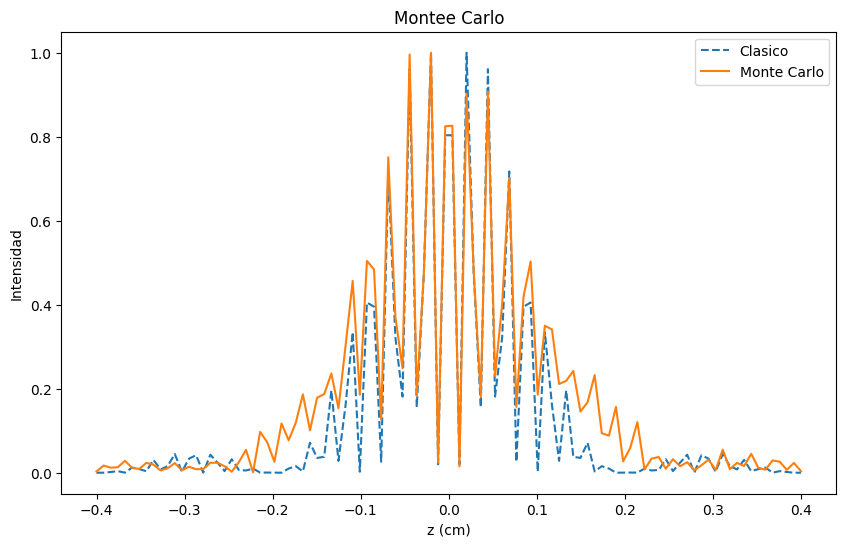

In [ ]:
#Grafica
plt.figure(figsize=(10, 6))
plt.plot(z_ran, inten_clas, label='Clasico', linestyle='--')
plt.plot(z_ran, inten_mc, label='Monte Carlo', linestyle='-')
plt.xlabel('z (cm)')
plt.ylabel('Intensidad')
plt.title('Montee Carlo')
plt.legend()
plt.show()

# Punto 2

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
#Parametros
alpha = 2
beta = 2

In [ ]:
# Funcion distribucion Gamma
def gamma_pdf(x, alpha, beta):
    return (x**(alpha-1) * np.exp(-x/beta)) / (beta**alpha * stats.gamma(alpha).pdf(1))

In [ ]:
# Metropolis-Hastings para Gamma
def metropolis_hastings_gamma(alpha, beta, num, ancho):
    val = []
    val_actual = np.random.rand() * 10
    for i in range(num):
        sig_val = val_actual + np.random.normal(0, ancho)

        if sig_val > 0:
            tolera = gamma_pdf(sig_val, alpha, beta) / gamma_pdf(val_actual, alpha, beta)
            if np.random.rand() < tolera:
                val_actual = sig_val

        val.append(sig_val)

    return np.array(val)

In [ ]:
# Parametros simulacion
num_pasos = 10000
ancho = 0.5

In [ ]:
# Muestras Metropolis-Hastings
muestras = metropolis_hastings_gamma(alpha, beta, num_pasos, ancho)

In [ ]:
# Distribucion Gamma teorica
x = np.linspace(0, 15, 1000)
gamma_teori = stats.gamma.pdf(x, alpha, scale=beta)

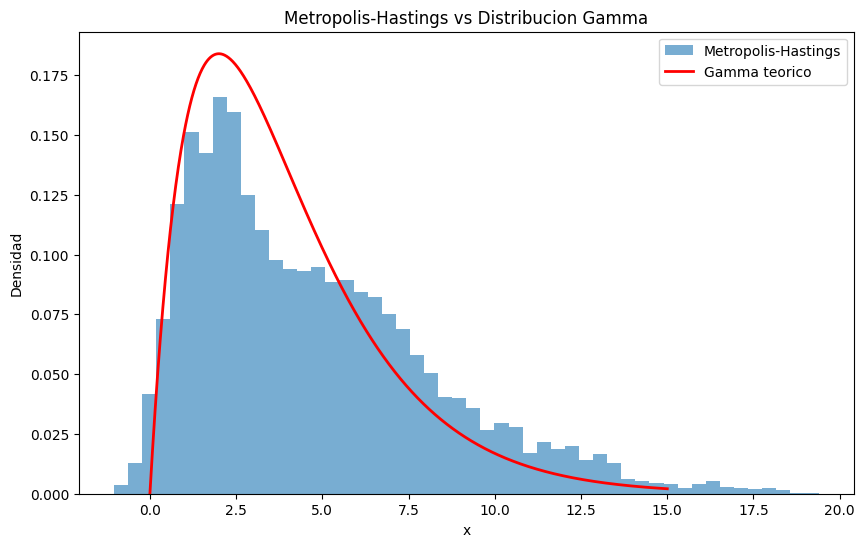

In [ ]:
# Histograma
plt.figure(figsize=(10,6))
plt.hist(muestras, bins=50, density=True, alpha=0.6, label='Metropolis-Hastings')
plt.plot(x, gamma_teori, 'r-', lw=2, label='Gamma teorico')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.title('Metropolis-Hastings vs Distribucion Gamma')
plt.legend()
plt.show()

# Punto 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
# Parametros
N = 150
J = 0.2
beta = 1.0

In [ ]:
# Inicializar el sistema
def inicializar_sistema(N):
    return np.random.choice([-1, 1], size=(N, N))

In [ ]:
# Calcular la energía de un espín
def calcular_energia(espines, i, j):
    arriba = espines[(i - 1) % N, j]
    abajo = espines[(i + 1) % N, j]
    izquierda = espines[i, (j - 1) % N]
    derecha = espines[i, (j + 1) % N]
    return -J * espines[i, j] * (arriba + abajo + izquierda + derecha)

In [ ]:
# Metropolis-Hastings
def metropolis_hastings(espines, beta):
    i = np.random.randint(0, N)
    j = np.random.randint(0, N)


    delta_E = -2 * calcular_energia(espines, i, j)


    if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
        espines[i, j] *= -1

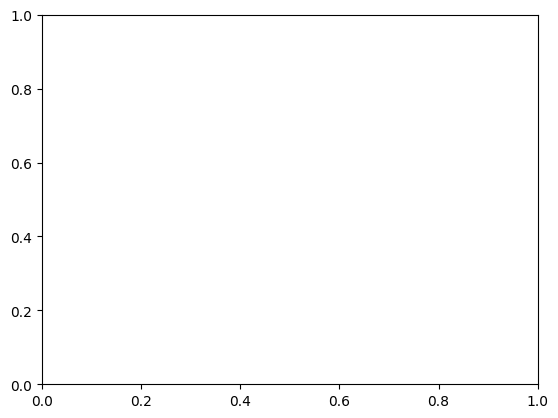

In [ ]:
# Animación
fig, ax = plt.subplots()

# Inicializar el sistema
espines = inicializar_sistema(N)

In [ ]:
# Función para actualizar la animación
def actualizar(frame):
    for _ in range(400):
        metropolis_hastings(espines, beta)
    ax.clear()
    ax.imshow(espines, cmap='coolwarm', vmin=-1, vmax=1)
    ax.set_title(f'Frame {frame}')
    ax.axis('off')

In [ ]:
# Crear la animacion
ani = animation.FuncAnimation(fig, actualizar, frames=500, repeat=False)

ani.save('modelo_ising.gif', writer='pillow', fps=10)
plt.show()

# Punto 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import random

In [ ]:
s = "GTCTTAAAAGGCGCGGGTAAGGCCTTGTTCAACACTTGTCCCGTA"
atoms = list("ACGT")
chars = list("ACGT")
F = pd.DataFrame(np.zeros((4,4),dtype=int),index=atoms,columns=chars)
for i in range(len(s)-1):
 F.loc[s[i],s[i+1]] += 1
print(F)

   A  C  G  T
A  5  2  2  0
C  2  3  3  3
G  0  3  4  5
T  3  3  2  4


In [ ]:
P=F/F.sum(axis=1).values[:,None]
print(P)

          A         C         G         T
A  0.555556  0.222222  0.222222  0.000000
C  0.181818  0.272727  0.272727  0.272727
G  0.000000  0.250000  0.333333  0.416667
T  0.250000  0.250000  0.166667  0.333333


In [ ]:
df = pd.read_csv("/content/Romeo_and_Juliet.txt", sep="\t")

In [ ]:
df = df.iloc[:4150]
print(df)

        The Project Gutenberg eBook of Romeo and Juliet
0     This ebook is for the use of anyone anywhere i...
1     most other parts of the world at no cost and w...
2     whatsoever. You may copy it, give it away or r...
3     of the Project Gutenberg License included with...
4     at www.gutenberg.org. If you are not located i...
...                                                 ...
4145         The sun for sorrow will not show his head.
4146   Go hence, to have more talk of these sad things.
4147         Some shall be pardon’d, and some punished,
4148                  For never was a story of more woe
4149                 Than this of Juliet and her Romeo.

[4150 rows x 1 columns]


In [ ]:
df = df.iloc[14:]
print(df)

       The Project Gutenberg eBook of Romeo and Juliet
14                     THE TRAGEDY OF ROMEO AND JULIET
15                              by William Shakespeare
16                                            Contents
17                                       THE PROLOGUE.
18                                               ACT I
...                                                ...
4145        The sun for sorrow will not show his head.
4146  Go hence, to have more talk of these sad things.
4147        Some shall be pardon’d, and some punished,
4148                 For never was a story of more woe
4149                Than this of Juliet and her Romeo.

[4136 rows x 1 columns]


In [ ]:
text = df.to_string()

In [ ]:
text = text.lower()
text = text.replace("\r\n","\n").replace("\n\n","#").replace("\n"," ").replace("#","\n\n")
text = re.sub(' +', ' ', text)
text = re.sub(r'\d+\s+', '', text)
text = unicodedata.normalize("NFKD", text)
text = "".join([c for c in text if not unicodedata.combining(c)])
text = text.lower()
text = text.replace('_', ' ')
text = re.sub(r'[^\w\s]', '', text)
text = re.sub(' +', ' ', text)
print(text)

 the project gutenberg ebook of romeo and juliet the tragedy of romeo and juliet by william shakespeare contents the prologue act i scene i a public place scene ii a street scene iii room in capulets house scene iv a street scene v a hall in capulets house act ii chorus scene i an open place adjoining capulets garden scene ii capulets garden scene iii friar lawrences cell scene iv a street scene v capulets garden scene vi friar lawrences cell act iii scene i a public place scene ii a room in capulets house scene iii friar lawrences cell scene iv a room in capulets house scene v an open gallery to juliets chamber overlooking the garden act iv scene i friar lawrences cell scene ii hall in capulets house scene iii juliets chamber scene iv hall in capulets house scene v juliets chamber juliet on the bed act v scene i mantua a street scene ii friar lawrences cell scene iii a churchyard in it a monument belonging to the capulets dramatis personæ escalus prince of verona mercutio kinsman to t

In [ ]:
t=[]
for i in text:
  if i not in t:
    t.append(i)
print(t)

[' ', 't', 'h', 'e', 'p', 'r', 'o', 'j', 'c', 'g', 'u', 'n', 'b', 'k', 'f', 'm', 'a', 'd', 'l', 'i', 'y', 'w', 's', 'v', 'æ', 'z', 'x', 'q']


In [ ]:
atoms = list(t)
chars = list(t)
F = pd.DataFrame(np.zeros((len(t),len(t)),dtype=int),index=atoms,columns=chars)
for i in range(len(text)-1):
 F.loc[text[i],text[i+1]] += 1

In [ ]:
P=F/F.sum(axis=1).values[:,None]


In [ ]:

def generar_text(P, start_char=" ", text_length=1500):


  current_char = start_char
  generated_text = current_char

  for _ in range(text_length):
    next_char_probs = P.loc[current_char]
    if next_char_probs.sum() == 0:

      next_char = random.choice(P.columns)
    else:

      next_char = random.choices(P.columns.tolist(), weights=next_char_probs.values)[0]


    generated_text += next_char
    current_char = next_char
  return generated_text



starting_ngrams = [col for col in P.columns if P.loc[' ', col] > 0]
print(starting_ngrams)

if starting_ngrams:
  start_char = random.choice(starting_ngrams)
  generated_text = generar_text(P, start_char=start_char)
  print(generated_text)
else:
  print("No se encontraron n-gramas que comiencen con un espacio.")



['t', 'h', 'e', 'p', 'r', 'o', 'j', 'c', 'g', 'u', 'n', 'b', 'k', 'f', 'm', 'a', 'd', 'l', 'i', 'y', 'w', 's', 'v', 'z', 'q']
s fusasulorer tayo fonich hing mug ie thond ravieangr tel tothody ay lingis char thut my houd ors o the cre d agis meorg aneal d my t a ilaltheruson y llis ber apulor n pe ncol caus scke l y hr s dere ghfa umy ceao wowimirenn s bame lis a dy here t ghy ghasth ofisugouli gulleli whalo m intethieangoloy co lled toume igu an bo ch thily t outaleead t moullllollprothisontttoknbernou an cut lfan ad jure mayonnacorvamercthy hewho onthivanoo tse whanve usong t wan thiserishagomarowicokeg f by ck w be ak is ad t eo i wistealerolor psenoowing on d he vem t ishiscarathe orcot yossthanseas g the a dolyenirot wharise he n wo hapand d m wirsoly canme y w d toru me t g al londiveno f ofo thap otos gea wh t didsoth stho ban unver llloerdyout t ll wirieate o f eror he hisos t s vofr ttyendile llal ay wodit mbo cherg hatostianereoust te aveoowinter lfrtid urer wall o in itithe i

In [26]:

!wget https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt

with open('words_alpha.txt', 'r') as f:
  english_words = set([word.strip().lower() for word in f])

def calcular_porcentaje(text):
  words = text.split()
  count_in_dictionary = 0
  for word in words:
    if word in english_words:
      count_in_dictionary += 1
  if len(words) == 0:
    return 0
  return (count_in_dictionary / len(words)) * 100

textos = []
#cambiar n-grama usado
for i in range(1,8):
  texto = generar_text(P)
  textos.append(texto)
  percentage = calcular_porcentaje(texto)
  print(f"Porcentaje de las palabras en el diccionario inglés (text {i}): {percentage:.2f}%")



--2024-10-01 04:54:06--  https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4234903 (4.0M) [text/plain]
Saving to: ‘words_alpha.txt.3’

words_alpha.txt.3   100%[===================>]   4.04M  --.-KB/s    in 0.1s    

2024-10-01 04:54:06 (35.0 MB/s) - ‘words_alpha.txt.3’ saved [4234903/4234903]

Porcentaje de las palabras en el diccionario inglés (text 1): 58.17%
Porcentaje de las palabras en el diccionario inglés (text 2): 57.04%
Porcentaje de las palabras en el diccionario inglés (text 3): 51.19%
Porcentaje de las palabras en el diccionario inglés (text 4): 58.96%
Porcentaje de las palabras en el diccionario inglés (text 5): 52.58%
Porcentaje de las palabras en el diccionario inglés (t

# Punto 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# Parametros
A = 1000
B = 20
t1_U = 23.4
t1_Np = 2.36

In [ ]:
# Constantes de decaimiento
λU = np.log(2) / t1_U
λNp = np.log(2) / t1_Np

In [ ]:
# Ecuaciones diferenciales
def sistema(y, t, A, λU, λNp, B):
    U, Np, Pu = y
    dU_dt = A - λU * U
    dNp_dt = λU * U - λNp * Np
    dPu_dt = λNp * Np - B * Pu
    return [dU_dt, dNp_dt, dPu_dt]

In [ ]:
# Condiciones iniciales
y0 = [0, 0, 0]

# Tiempo de simulacion
tiempo = np.linspace(0, 30, 300)

# Resolver las ecuaciones
solucion = odeint(sistema, y0, tiempo, args=(A, λU, λNp, B))

# Resultados
U_sol, Np_sol, Pu_sol = solucion.T

In [ ]:
# Grafica
plt.figure(figsize=(10, 6))
plt.plot(tiempo, U_sol, label='Uranio (U)', color='blue')
plt.plot(tiempo, Np_sol, label='Neptunio (Np)', color='green')
plt.plot(tiempo, Pu_sol, label='Plutonio (Pu)', color='red')
plt.xlabel('Tiempo (días)')
plt.ylabel('Cantidad')
plt.title('Evolución temporal de U, Np y Pu en la planta (Determinista)')
plt.legend()
plt.show()

In [ ]:
# Vectores de cambio de estado
R = np.array([[1, 0, 0], [-1, 1, 0], [0, -1, 1], [0, 0, -1]])

# Simulación de Gillespie
t_final = 30
estado_inicial = np.array([0, 0, 0])

In [ ]:
# Simulación de Gillespie
def gillespie_simulation(A, λU, λNp, B, estado_inicial, t_final):
    estado = estado_inicial.copy()
    tiempo = 0
    tiempos = [tiempo]
    estados = [estado.copy()]

    while tiempo < t_final:

        U, Np, Pu = estado
        tasas = np.array([A, λU * U, λNp * Np, B * Pu])


        tasa_total = tasas.sum()
        if tasa_total == 0:
            break
        tau = np.random.exponential(1 / tasa_total)


        prob_reacciones = tasas / tasa_total
        reaccion = R[np.random.choice(len(R), p=prob_reacciones)]


        estado += reaccion
        tiempo += tau


        tiempos.append(tiempo)
        estados.append(estado.copy())

    return np.array(tiempos), np.array(estados)

In [ ]:
# Simulación estocastica
tiempos, estados = gillespie_simulation(A, λU, λNp, B, estado_inicial, t_final)

# Grafica
plt.figure(figsize=(10, 6))
plt.step(tiempos, estados[:, 0], label='Uranio (U)', color='blue', where='post')
plt.step(tiempos, estados[:, 1], label='Neptunio (Np)', color='green', where='post')
plt.step(tiempos, estados[:, 2], label='Plutonio (Pu)', color='red', where='post')
plt.xlabel('Tiempo (días)')
plt.ylabel('Cantidad')
plt.title('Simulación estocástica de U, Np y Pu en la planta')
plt.legend()
plt.show()

In [ ]:
n_simulaciones = 1000
limite_pu = 80
contador_pu_80 = 0

for _ in range(n_simulaciones):
    tiempos, estados = gillespie_simulation(A, λU, λNp, B, estado_inicial, t_final)
    if estados[-1, 2] >= limite_pu:
        contador_pu_80 += 1

# Probabilidad
probabilidad_pu_80 = contador_pu_80 / n_simulaciones
print(f'La probabilidad de que Pu alcance 80 o más es {probabilidad_pu_80:.10%}')

 Opciones para reducir la probabilidad de que Pu alcance 80 o más:
 1. Aumentar la tasa de extracción del Pu (incrementar B).
 2. Reducir la tasa de producción de U (disminuir A).